# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the datasets

In [2]:
dataset = sns.load_dataset('titanic')

In [3]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dataset.shape

(891, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
dataset['sex']=dataset['sex'].apply(lambda sex:1 if sex=='male' else 0)


In [8]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Histogram of Age vs number of passangers

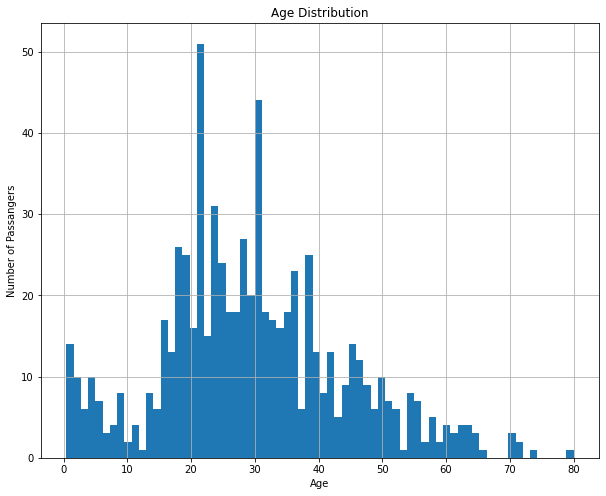

In [9]:
plt.figure(figsize=(10,8))
dataset['age'].hist(bins=70)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Number of Passangers')
plt.show()

# Countplot of survived

<AxesSubplot:xlabel='survived', ylabel='count'>

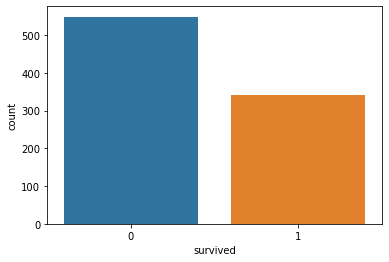

In [10]:
sns.countplot(x='survived', data=dataset)

# gender wise survived

In [11]:

dataset.groupby(['survived','sex'])['survived'].count()

survived  sex
0         0       81
          1      468
1         0      233
          1      109
Name: survived, dtype: int64

#  gender count

In [12]:
gender_count = dataset.groupby('sex')['sex'].count()
gender_count

sex
0    314
1    577
Name: sex, dtype: int64

# Total survived

In [13]:
dataset.groupby(['survived'])['survived'].count()

survived
0    549
1    342
Name: survived, dtype: int64

# Countplot of survived sex wise

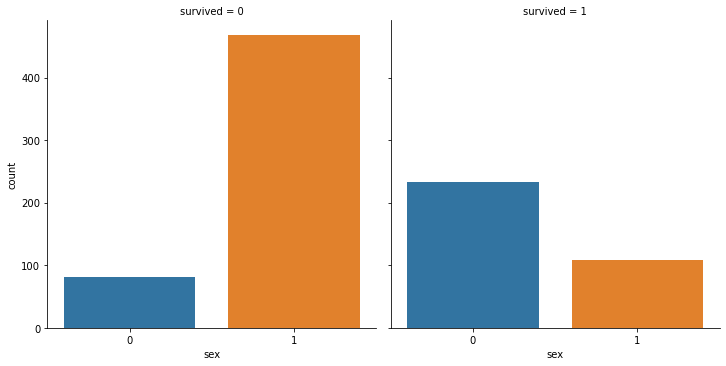

In [14]:
sns.catplot(x='sex', col='survived', kind='count', data=dataset)

# Class Breakdown

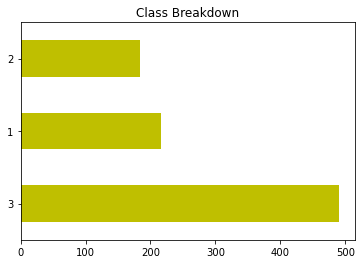

In [15]:
dataset.pclass.value_counts().plot(kind='barh',color='y')
plt.title("Class Breakdown")
plt.show()

# Passenger Class wise Survived vs Non-Survived distribution

<AxesSubplot:xlabel='pclass', ylabel='count'>

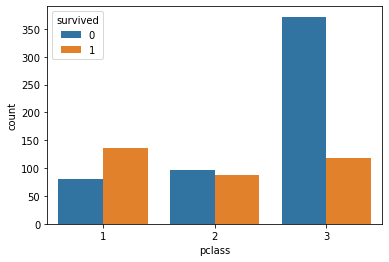

In [16]:
sns.countplot(x='pclass',hue='survived',data=dataset)

# Passangers Embarked

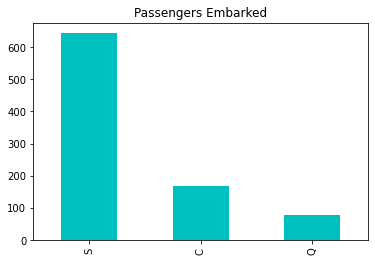

In [17]:
dataset.embarked.value_counts().plot(kind='bar',color='c')
plt.title("Passengers Embarked")
plt.show()

In [18]:
dataset.groupby(['embarked'])['embarked'].count()

embarked
C    168
Q     77
S    644
Name: embarked, dtype: int64

# number of passangers vs embarked

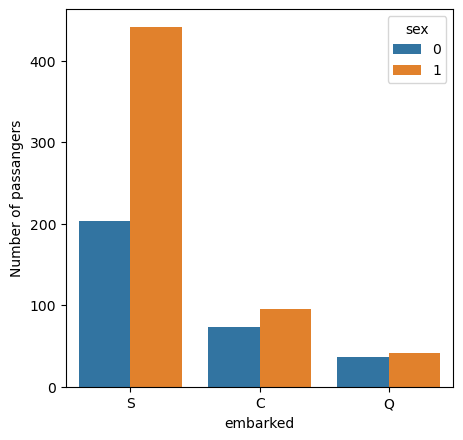

In [19]:
plt.figure(figsize=(5, 5),dpi=100)
sns.countplot(x='embarked',hue='sex',data=dataset)
plt.ylabel('Number of passangers')
plt.show()

In [20]:
dataset.groupby(['embarked','sex'])['embarked'].count()

embarked  sex
C         0       73
          1       95
Q         0       36
          1       41
S         0      203
          1      441
Name: embarked, dtype: int64

# Class wise embarked

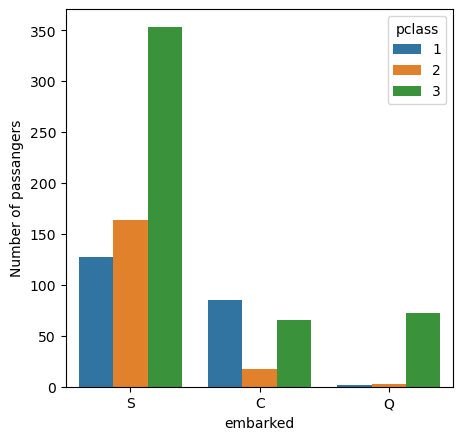

In [21]:
plt.figure(figsize=(5, 5),dpi=100)
sns.countplot(x='embarked',hue='pclass',data=dataset)
plt.ylabel('Number of passangers')
plt.show()

# Sibsp survival probability

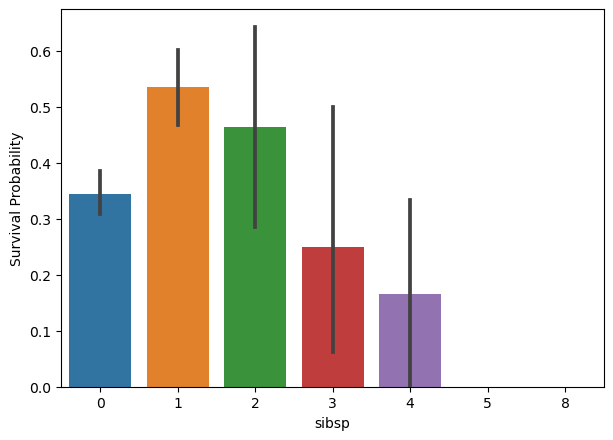

In [22]:
plt.figure(figsize=(7, 5),dpi=100)
sns.barplot(x='sibsp', y='survived', data=dataset)
plt.ylabel('Survival Probability')
plt.show()

# Alive

In [23]:
dataset['alive']=dataset['alive'].apply(lambda alive:1 if alive=='yes' else 0)

In [24]:
alive_count = dataset.groupby('alive')['alive'].count()

In [25]:
alive_count

alive
0    549
1    342
Name: alive, dtype: int64

# Fare

In [26]:
dataset['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

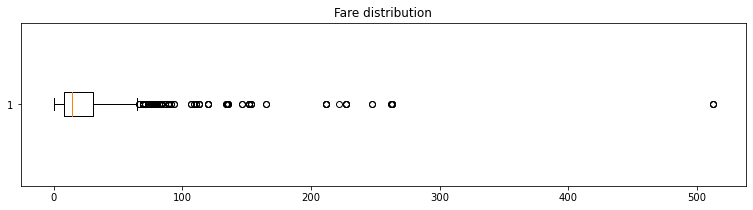

In [27]:
plt.figure(figsize=(13,3))
plt.title('Fare distribution')
plt.boxplot(dataset['fare'], vert=False)
plt.show()

# Modeling the Data

In [28]:
# Drop the columns
dataset = dataset.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

In [29]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [30]:
#Remove the rows with missing values
dataset = dataset.dropna(subset =['embarked', 'age'])

In [31]:
dataset.shape

(712, 8)

In [32]:
dataset.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

# Encoding categorical data values 

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [34]:
#Encode sex column
dataset.iloc[:,2]= labelencoder.fit_transform(dataset.iloc[:,2].values)

In [35]:
#Encode embarked
dataset.iloc[:,7]= labelencoder.fit_transform(dataset.iloc[:,7].values)

In [36]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Split the dataset

In [37]:
X = dataset.iloc[:, 1:].values 
Y = dataset.iloc[:, 0].values 

In [38]:
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [39]:
Y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

# Split the dataset into Training set and Testing set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [41]:
X_train.shape

(569, 7)

In [42]:
Y_train.shape

(569,)

In [43]:
X_test.shape

(143, 7)

In [44]:
Y_test.shape

(143,)

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Testing on Machine Learning Models

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

y_pred = random_forest.predict(X_test)

In [48]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
randomForestAccuracy = accuracy_score(Y_test, y_pred)
print(randomForestAccuracy)

[[66 16]
 [14 47]]
0.7902097902097902


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

y_pred = logreg.predict(X_test)

In [52]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
logisticRegressionAccuracy = accuracy_score(Y_test, y_pred)
print(logisticRegressionAccuracy)

[[73  9]
 [18 43]]
0.8111888111888111


# K Nearest Neighbor

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
y_pred = knn.predict(X_test)  

In [56]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
knnAccuracy = accuracy_score(Y_test, y_pred)
print(knnAccuracy)

[[67 15]
 [20 41]]
0.7552447552447552


# Linear Support Vector Machine

In [58]:
from sklearn.svm import LinearSVC

In [59]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

y_pred = linear_svc.predict(X_test)

/home/vgnandan/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [60]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
linearSVCAccuracy = accuracy_score(Y_test, y_pred)
print(linearSVCAccuracy)

[[72 10]
 [18 43]]
0.8041958041958042


# Kernal Support Vector Machine

In [62]:
from sklearn.svm import SVC

In [63]:
kernal_svc = SVC(kernel = 'rbf', random_state = 0)
kernal_svc.fit(X_train, Y_train)

y_pred = kernal_svc.predict(X_test)

In [64]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
kernalSVCAccuracy = accuracy_score(Y_test, y_pred)
print(kernalSVCAccuracy)

[[75  7]
 [22 39]]
0.7972027972027972


# Gaussian Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
y_pred = gaussian.predict(X_test)

In [68]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
gaussianNBAccuracy = accuracy_score(Y_test, y_pred)
print(gaussianNBAccuracy)

[[69 13]
 [23 38]]
0.7482517482517482


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
y_pred = decision_tree.predict(X_test)

In [72]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]

# Making the Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
decisionTreeAccuracy = accuracy_score(Y_test, y_pred)
print(decisionTreeAccuracy)

[[62 20]
 [10 51]]
0.7902097902097902


# print all models accuracy

In [74]:
print("Random Forest Classifier Accuracy: ", randomForestAccuracy*100)
print("Logistic Regression Accuracy: ", logisticRegressionAccuracy*100)
print("K Nearest Neighbor Classifier Accuracy: ",knnAccuracy*100)
print("Linear Support Vector Machine Accuracy: ", linearSVCAccuracy*100)
print("Kernal Support Vector Machine Accuracy: ", kernalSVCAccuracy*100)
print("Gaussian Naive Bayes Accuracy: ",gaussianNBAccuracy*100)
print("Decision Tree Accuracy: ", decisionTreeAccuracy*100)

Random Forest Classifier Accuracy:  79.02097902097903
Logistic Regression Accuracy:  81.11888111888112
K Nearest Neighbor Classifier Accuracy:  75.52447552447552
Linear Support Vector Machine Accuracy:  80.41958041958041
Kernal Support Vector Machine Accuracy:  79.72027972027972
Gaussian Naive Bayes Accuracy:  74.82517482517483
Decision Tree Accuracy:  79.02097902097903
